# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:\\Users\\Paul\\Downloads\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt

In [5]:
# Get the first batch of images and labels
images, labels = next(training_set)

In [6]:
# Define the number of rows and columns for the grid
rows, cols = 3, 7  # This will create a 2x3 grid

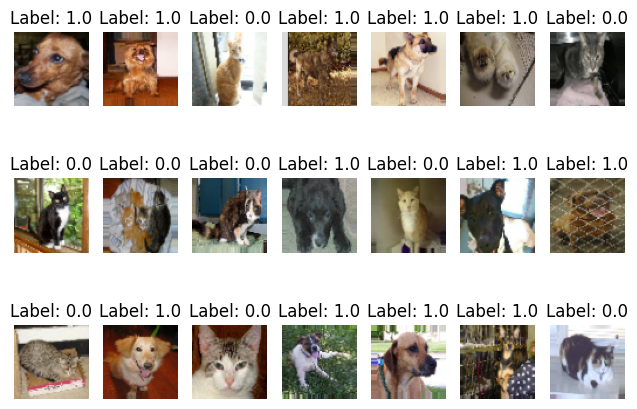

In [7]:
# Plot the first 21 images in the grid
for i in range(21):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')

# Adjust layout so titles don't overlap
plt.tight_layout()

plt.show()

### Preprocessing the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("C:\\Users\\Paul\\Downloads\\test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
250/250 [==============================] - 430s 2s/step - loss: 0.6619 - accuracy: 0.5939 - val_loss: 0.5908 - val_accuracy: 0.6965
Epoch 2/15
250/250 [==============================] - 51s 205ms/step - loss: 0.5944 - accuracy: 0.6845 - val_loss: 0.5467 - val_accuracy: 0.7390
Epoch 3/15
250/250 [==============================] - 50s 201ms/step - loss: 0.5419 - accuracy: 0.7265 - val_loss: 0.5214 - val_accuracy: 0.7500
Epoch 4/15
250/250 [==============================] - 50s 198ms/step - loss: 0.5265 - accuracy: 0.7414 - val_loss: 0.5006 - val_accuracy: 0.7720
Epoch 5/15
250/250 [==============================] - 50s 199ms/step - loss: 0.4912 - accuracy: 0.7596 - val_loss: 0.5239 - val_accuracy: 0.7410
Epoch 6/15
250/250 [==============================] - 55s 220ms/step - loss: 0.4745 - accuracy: 0.7680 - val_loss: 0.5605 - val_accuracy: 0.7290
Epoch 7/15
250/250 [==============================] - 61s 244ms/step - loss: 0.4567 - accuracy: 0.7832 - val_loss: 0.4634 - val_accu

## Part 4 - Making a single prediction

In [18]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

In [19]:
# Load and preprocess the image
test_image = load_img(r"C:\Users\Paul\Downloads\single_prediction\dc4.jpg", target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 351ms/step


In [ ]:
print(prediction)

In [22]:
pip install opencv-python-headless

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 262.6 kB/s eta 0:02:28
   ---------------------------------------- 0.1/38.8 MB 409.6 kB/s eta 0:01:35
   ---------------------------------------- 0.1/38.8 MB 438.9 kB/s eta 0:01:29
   ---------------------------------------- 0.1/38.8 MB 504.4 kB/s eta 0:01:17
   ---------------------------------------- 0.2/38.8 MB 541.0 kB/s eta 0:01:12
   ---------------------------------------- 0.2/38.8 MB 623.6 kB/s eta 0:01:02
   ---------------------------------------- 0.2/38.8 MB 626.9 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.8 MB 681.0 kB/s eta 0:00:57
   ---------------------------------------- 0.4/38.8 MB 768.6 kB/s eta 0:00:50
   ---------------------------------------- 0.4/38.8 MB 795.3 kB/s eta 0:00:49
   ---------------------------------------- 0.5/38.8 MB 862.7 kB/s eta

In [23]:
import cv2
from tensorflow.keras.models import load_model

In [24]:
def sliding_window(image, step_size, window_size):
    # Slide a window across the image
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

In [26]:
def detect_cats(image, model, window_size=(64, 64), step_size=32, threshold=0.5):
    boxes = []
    for (x, y, window) in sliding_window(image, step_size, window_size):
        if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
            continue

        # Preprocess the window (resize, normalize, etc.) as your CNN model expects
        window_resized = cv2.resize(window, window_size)
        window_resized = window_resized / 255.0
        window_resized = np.expand_dims(window_resized, axis=0)

        # Use the CNN model to predict
        pred = model.predict(window_resized)

        # If the prediction probability is greater than the threshold, consider it a detection
        if pred > threshold:
            boxes.append((x, y, x + window_size[0], y + window_size[1]))

    return boxes

In [27]:
def non_max_suppression(boxes, overlap_thresh=0.3):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    pick = []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_thresh)[0])))

    return boxes[pick].astype("int")

In [28]:
def count_cats(image_path):
    image = cv2.imread(image_path)
    detected_boxes = detect_cats(image, model)
    final_boxes = non_max_suppression(detected_boxes)

    # Draw the bounding boxes
    for (x1, y1, x2, y2) in final_boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Count the number of cats
    num_cats = len(final_boxes)
    print(f'Number of cats detected: {num_cats}')

    # Display the image with bounding boxes
    cv2.imshow('Cats Detected', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return num_cats

In [30]:
# Example usage
image_path = r"C:\Users\Paul\Downloads\single_prediction\dc5.jpg"
num_cats = count_cats(image_path)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'